In [88]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils

In [89]:
# Loading MNIST Dataset

(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

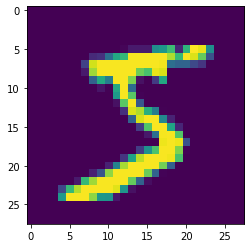

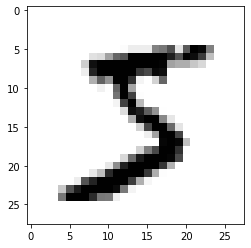

In [90]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

# Resizing Image

In [91]:
import numpy as np
# Resizing Image to make it situable for Convolution Operation  
x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

x_train.shape

(60000, 28, 28, 1)

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D, Flatten

In [93]:
#Create Model
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape = (28,28,1)))
model.add(Activation("relu"))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2))),
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2))),

model.add(Flatten()),

model.add(Dense(64)),
model.add(Activation("relu")),

model.add(Dense(10)),
model.add(Activation("softmax"))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_47 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_48 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
activation_49 (Activation)   (None, 10, 10, 64)      

In [94]:
# Training the Data

model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])

In [95]:
model.fit(x_train,y_train,epochs=20, validation_split=0.3,verbose=1)

Epoch 1/20
1313/1313 [==============================] - 39s 30ms/step - loss: 0.1447 - accuracy: 0.9551 - val_loss: 0.0614 - val_accuracy: 0.9818
Epoch 2/20
1313/1313 [==============================] - 39s 29ms/step - loss: 0.0461 - accuracy: 0.9853 - val_loss: 0.0436 - val_accuracy: 0.9874
Epoch 3/20
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0640 - val_accuracy: 0.9818
Epoch 4/20
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0239 - accuracy: 0.9920 - val_loss: 0.0416 - val_accuracy: 0.9876
Epoch 5/20
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0191 - accuracy: 0.9936 - val_loss: 0.0481 - val_accuracy: 0.9868
Epoch 6/20
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.0430 - val_accuracy: 0.9889
Epoch 7/20
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0129 - accuracy: 0.9954 - val_loss: 0.0430 -

In [96]:
test_loss , test_accuracy = model.evaluate(x_test,y_test,verbose=0)

In [109]:
print("Acurracy",test_accuracy*100)

Acurracy 99.23999905586243
